# Gene ontology enrichment analysis
The following code was used to conduct the gene ontology (GO) enrichment analysis for our larval bacterial exposure experiment involving *Astrangia poculata* larvae exposed to both probiotic (*Phaeobacter inhibens* S4) and pathogenic (*Vibrio corallilyticus* RE22) strains of bacteria. The workflow for this analysis uses scripts from Dr. Mikhail Matz's GitHub linked below. The basis of this analysis is a Mann-Whitney U (MWU) test which is a rank based test that compares the average rank of a GO term to the average rank of all GO terms in the dataset to calculate a difference. The difference between those values is called delta rank and represents the magnitude and direction of enrichment for each term in the dataset and then uses the Mann-Whitney U test to assess significance. 

The inputs for the analysis include the log fold change (LFC) outputs from the various differential expression comparisons, the GO annotations file for the reference transcriptome, and a `go.obo` file that relates the GO terms to the hierarchy of the GO database. The LFC outputs used here were generated in the differential expression analysis script for this project. The annotations file was a tab separated annotation file including transcript IDs, GO terms, and the GO names. The `go.obo` file can be downloaded from the gene ontology website (https://geneontology.org/docs/download-ontology/). You will also need the scripts from Dr. Matz's GitHub directory dowloaded to your working directory in order for this script to work.

#### Dr. Matz's GO MWU repository
https://github.com/z0on/GO_MWU

#### Manuscript reference
Borbee, E.M., Changsut, I.V., Bernabe, K., Schickle, A., Nelson, D., Sharp, K.H., and Fuess, L.E. (2025) Coral larvae have unique transcriptomic responses to pathogenic and probiotic bacteria. *In prep*.

## Contents
1. [General setup](#1)
2. [Set inputs](#2)
3. [Calculating statistics](#3)
4. [View results](#4)
5. [Extract representative GOs](#5)
6. [Plotting enrichment results](#6)

<a id=1></a>
## 1. General setup
For this script you will need to parse your differential expression outputs to the proper format for the GO MWU functions. Below, I set my working directory, import my differential expression outputs, pull the transcript IDs and log fold change data for each comparison, and export them as comma separated files to my working directory. 

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("~/Desktop/TXST/AstrangiaLarval_transcriptomics/finalTranscriptome/GO_MWU/")

*Pathogen vs Control*

In [3]:
RE22vControl <- read.csv("../DESeq/DESeq_RE22vControl.csv")
head(RE22vControl)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRINITY_DN7931_c0_g2_i2,213.447901,4.095274,0.4035634,10.147783,3.39000e-24,2.55000e-20
2,TRINITY_DN2150_c0_g1_i10,58.814216,4.127324,0.4853870,8.503161,1.84000e-17,6.94000e-14
3,TRINITY_DN34410_c0_g1_i1,162.008139,3.374140,0.4972554,6.785527,1.16000e-11,2.90000e-08
4,TRINITY_DN40298_c0_g1_i4,2.096032,4.671238,1.0827798,4.314116,1.60000e-05,3.01176e-02
5,TRINITY_DN84171_c0_g1_i2,37.704316,1.814353,0.4302026,4.217440,2.47000e-05,3.71527e-02
6,TRINITY_DN42183_c0_g1_i3,1.806638,4.010791,1.1459252,3.500046,4.65177e-04,5.82867e-01


In [4]:
RE22vControl <- RE22vControl[,c(1,3)]
head(RE22vControl)

,X,log2FoldChange
,<chr>,<dbl>
1,TRINITY_DN7931_c0_g2_i2,4.095274
2,TRINITY_DN2150_c0_g1_i10,4.127324
3,TRINITY_DN34410_c0_g1_i1,3.374140
4,TRINITY_DN40298_c0_g1_i4,4.671238
5,TRINITY_DN84171_c0_g1_i2,1.814353
6,TRINITY_DN42183_c0_g1_i3,4.010791


In [5]:
write.csv(RE22vControl, "DEseq_RE22vControl_LFC.csv", row.names = FALSE)

*Probiotic vs Control*

In [6]:
S4vControl <- read.csv("../DESeq/DESeq_S4vControl.csv")
head(S4vControl)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRINITY_DN34410_c0_g1_i1,162.00814,4.402882,0.4963873,8.869851,7.324376e-19,2.624324e-15
2,TRINITY_DN17150_c0_g2_i1,14.25456,3.159759,0.4488991,7.038908,1.937528e-12,3.471082e-09
3,TRINITY_DN43495_c0_g1_i1,11.99810,6.547429,0.9559838,6.848891,7.442445e-12,8.888760e-09
4,TRINITY_DN7931_c0_g2_i2,213.44790,2.375859,0.4069751,5.837848,5.287931e-09,3.789331e-06
5,TRINITY_DN84171_c0_g1_i2,37.70432,2.510434,0.4281201,5.863854,4.522450e-09,3.789331e-06
6,TRINITY_DN303_c2_g1_i1,18.01737,3.905300,0.6730133,5.802709,6.525206e-09,3.896636e-06


Before moving to the next section, make sure all scripts from Dr. Matz's GitHub are installed in the working directory.

In [7]:
S4vControl <- S4vControl[,c(1,3)]
head(S4vControl)

,X,log2FoldChange
,<chr>,<dbl>
1,TRINITY_DN34410_c0_g1_i1,4.402882
2,TRINITY_DN17150_c0_g2_i1,3.159759
3,TRINITY_DN43495_c0_g1_i1,6.547429
4,TRINITY_DN7931_c0_g2_i2,2.375859
5,TRINITY_DN84171_c0_g1_i2,2.510434
6,TRINITY_DN303_c2_g1_i1,3.905300


In [8]:
write.csv(S4vControl, "DEseq_S4vControl_LFC.csv", row.names = FALSE)

*Probiotic vs Pathogen*

In [9]:
RE22vS4 <- read.csv("../DESeq/DESeq_RE22vS4.csv")
head(RE22vS4)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRINITY_DN7931_c0_g2_i2,213.44790,6.471133,0.7099850,9.114464,7.906037e-20,5.943759e-16
2,TRINITY_DN34410_c0_g1_i1,162.00814,7.777021,0.8736778,8.901475,5.510922e-19,2.071556e-15
3,TRINITY_DN2150_c0_g1_i10,58.81422,6.584877,0.8736762,7.536977,4.809914e-14,1.205365e-10
4,TRINITY_DN84171_c0_g1_i2,37.70432,4.324787,0.7596071,5.693452,1.244959e-08,2.339901e-05
5,TRINITY_DN17150_c0_g2_i1,14.25456,4.328322,0.8511641,5.085180,3.672783e-07,4.833637e-04
6,TRINITY_DN303_c2_g1_i1,18.01737,6.225405,1.2264752,5.075851,3.857651e-07,4.833637e-04


In [10]:
RE22vS4 <- RE22vS4[,c(1,3)]
head(RE22vS4)

,X,log2FoldChange
,<chr>,<dbl>
1,TRINITY_DN7931_c0_g2_i2,6.471133
2,TRINITY_DN34410_c0_g1_i1,7.777021
3,TRINITY_DN2150_c0_g1_i10,6.584877
4,TRINITY_DN84171_c0_g1_i2,4.324787
5,TRINITY_DN17150_c0_g2_i1,4.328322
6,TRINITY_DN303_c2_g1_i1,6.225405


In [11]:
write.csv(RE22vS4, "DEseq_RE22vS4_LFC.csv", row.names = FALSE)

<a id=2></a>
## 2. Set inputs
Once the files have been parsed and exported, we can designate the input files. The formats required for each input are summarized below.

`input` = This is your LFC data. The files should be two columns of comma separated values: a transcript ID column, and a LFC or other continuous measure of significance column.

`goAnnotations` = This is the file containing annotations for the reference transcriptome. The format is two columns, one containing a transcript ID and the second containing lists of GO terms separated by semicolons.

`goDatabase` = This is the GO database file. This file is downloaded from the GO website (https://geneontology.org/docs/download-ontology/), you need the `.obo` file for the full dataset not the basic one.

`goDivision` = This tells the statistical function which GO division to look for enrichment in. It can be set to molecular function (MF), biological process (BP), or cellular component (CC).

Finally, the last line imports the custom functions for running the MWU statistics into your R environment.

In [12]:
input_RE22vC="DEseq_RE22vControl_LFC.csv"
input_S4vC="DEseq_S4vControl_LFC.csv"
input_RE22vS4="DEseq_RE22vS4_LFC.csv"

In [13]:
goAnnotations = "annos.txt"

In [14]:
goDatabase = "go.obo"

In [15]:
goDivisionMF = "MF"
goDivisionBP = "BP"
goDivisionCC = "CC"

In [16]:
source("gomwu.functions.R")

<a id=3></a>
## 3. Calculating statistics
For the statistics command, we ran each comparison file under each GO division (MF, BP, and CC). The first block of code sets the inputs for the comparsion and division and the second block of code runs the statistics. Details of the options in the stats function are below.

`perlPath` = replace this with the full path to perl executable if it is not in the systems path already

`largest` = a GO category will not be considered if it contains more than this fraction of the total number of genes

`smallest` = a GO category should contain at least this many genes to be considered

`clusterCutHeight` = threshold for merging similar (gene-sharing) terms, more details in Dr. Matz's README file

#### Error Message Troubleshooting: 
If you get a message saying there are no lines available for input, try opening the csv input file in Excel and saving it using `Ctrl + S`. This seems to solve the problem for me when I return to R and rerun the `gomwuStats()` function.

*Pathogen vs Control* - MF

In [18]:
RE22vControl_MF <- gomwuStats(input_RE22vC, goDatabase, goAnnotations, goDivisionMF,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


4 GO terms at 10% FDR



*Pathogen vs Control* - BP

In [19]:
RE22vControl_BP <- gomwuStats(input_RE22vC, goDatabase, goAnnotations, goDivisionBP,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


0 GO terms at 10% FDR



*Pathogen vs Control* - CC

In [20]:
RE22vControl_CC <- gomwuStats(input_RE22vC, goDatabase, goAnnotations, goDivisionCC,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


8 GO terms at 10% FDR



*Probiotic vs Control* - MF

In [22]:
S4vControl_MF <- gomwuStats(input_S4vC, goDatabase, goAnnotations, goDivisionMF,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


1 GO terms at 10% FDR



*Probiotic vs Control* - BP

In [23]:
S4vControl_BP <- gomwuStats(input_S4vC, goDatabase, goAnnotations, goDivisionBP,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


0 GO terms at 10% FDR



*Probiotic vs Control* - CC

In [24]:
S4vControl_CC <- gomwuStats(input_S4vC, goDatabase, goAnnotations, goDivisionCC,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


0 GO terms at 10% FDR



*Probiotic vs Pathogen* - MF

In [25]:
RE22vS4_MF <- gomwuStats(input_RE22vS4, goDatabase, goAnnotations, goDivisionMF,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


3 GO terms at 10% FDR



*Probiotic vs Pathogen* - BP

In [26]:
RE22vS4_BP <- gomwuStats(input_RE22vS4, goDatabase, goAnnotations, goDivisionBP,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


0 GO terms at 10% FDR



*Probiotic vs Pathogen* - CC

In [27]:
RE22vS4_CC <- gomwuStats(input_RE22vS4, goDatabase, goAnnotations, goDivisionCC,
                              perlPath="perl",
                              largest=0.1,
                              smallest=5,
                              clusterCutHeight=0.25)

Continuous measure of interest: will perform MWU test


3 GO terms at 10% FDR



<a id=4></a>
## 4. View results

Parameters for command are defined below:
- absValue = genes with the measure value exceeding this will be counted as "good genes", the setting of absValue = 1 is specific to using log2 fold changes, if you are using signed log p-values or evaluating WGCNA modules for enrichment, see Dr. Matz's GO MWU GitHub repository for more information

- level1 = the FDR threshold for plotting, if set to 1 it will plot all GO categories containing genes exceeding the absValue

- level2 = the FDR cutoff to print in regular (not italic) font

- level3 = the FDR cutoff to print in large bold font

- txtsize = decrease to fit more on one page or increase for better word cloud effect

- treeHeight = height of the hierarchical clustering tree


*Pathogen vs Control*

Loading required package: ape


Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 17

"Good genes" accounted for:  100 out of 393 ( 25% )



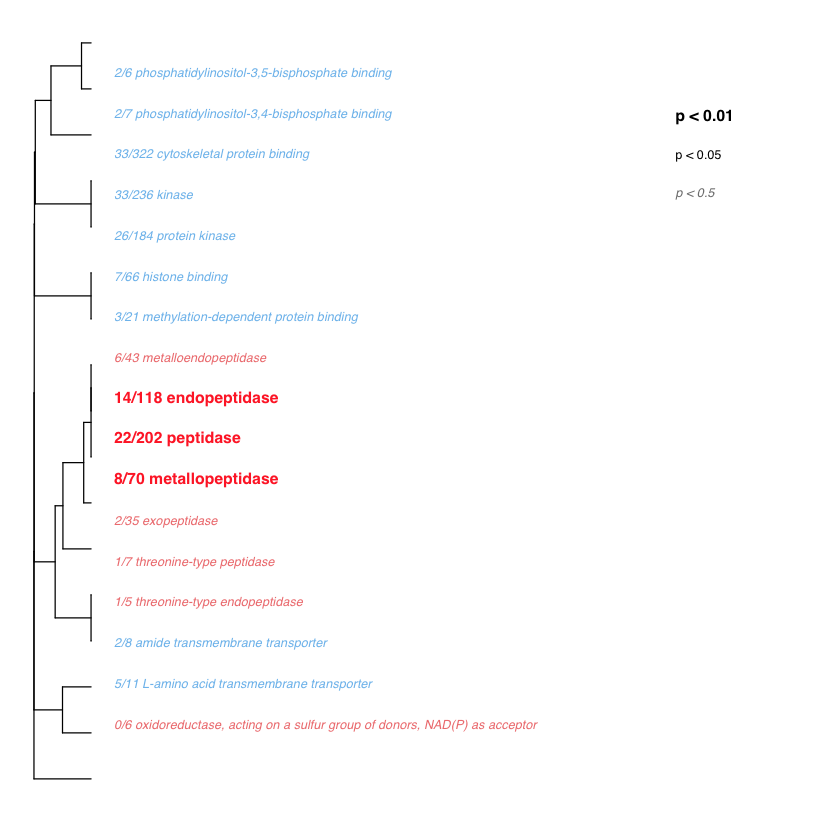

In [28]:
results_RE22vC_MF=gomwuPlot(input_RE22vC,goAnnotations,goDivisionMF,
                            absValue=1,
                            level1=0.5,
                            level2=0.05,
                            level3=0.01,
                            txtsize=1.2,
                            treeHeight=0.5)

In [29]:
results_RE22vC_MF[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
"0/6 oxidoreductase activity, acting on a sulfur group of donors, NAD(P) as acceptor",0.4327232969,1,lightcoral
5/11 L-amino acid transmembrane transporter activity,0.4983972238,0,skyblue2
2/8 amide transmembrane transporter activity,0.4327232969,0,skyblue2
1/5 threonine-type endopeptidase activity,0.4327232969,1,lightcoral
1/7 threonine-type peptidase activity,0.3773465000,1,lightcoral
2/35 exopeptidase activity,0.4327232969,1,lightcoral
8/70 metallopeptidase activity,0.0037415245,1,firebrick1
22/202 peptidase activity,0.0013097498,1,firebrick1
14/118 endopeptidase activity,0.0003832682,1,firebrick1


Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 19

"Good genes" accounted for:  133 out of 424 ( 31% )



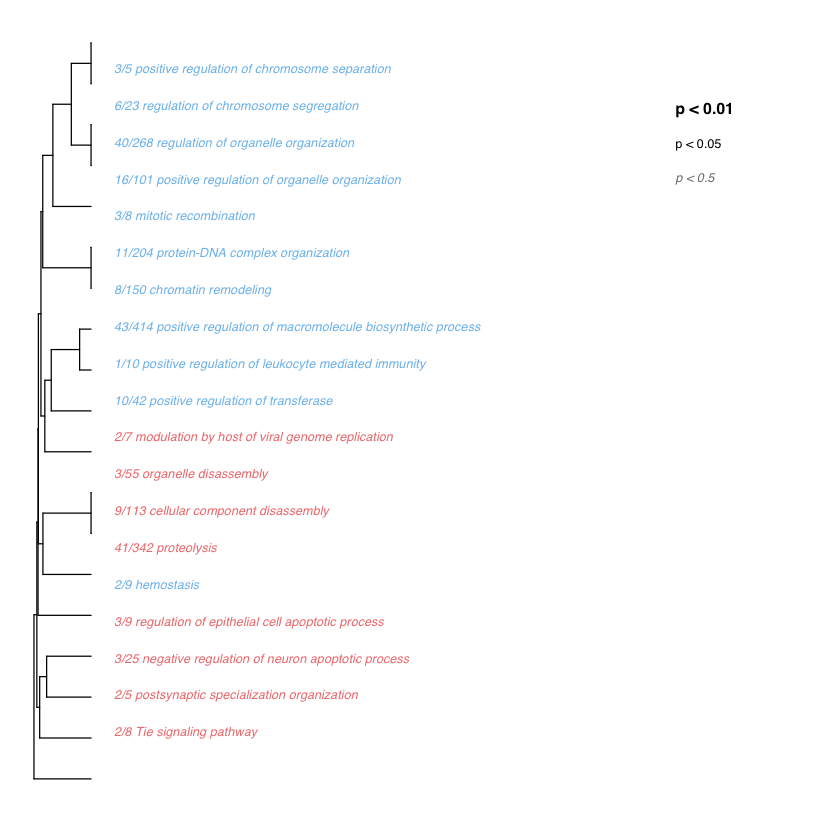

In [30]:
results_RE22vC_BP=gomwuPlot(input_RE22vC,goAnnotations,goDivisionBP,
                            absValue=1, 
                            level1=0.5,
                            level2=0.05,
                            level3=0.01,
                            txtsize=1.2,
                            treeHeight=0.5)

In [87]:
results_RE22vC_BP[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
2/8 negative regulation of humoral immune response mediated by circulating immunoglobulin,0.3989455,1,lightcoral
2/5 postsynaptic specialization organization,0.3835165,1,lightcoral
3/25 negative regulation of neuron apoptotic process,0.3835165,1,lightcoral
3/9 regulation of epithelial cell apoptotic process,0.3231407,1,lightcoral
2/9 hemostasis,0.4077151,0,skyblue2
41/342 proteolysis,0.1519285,1,lightcoral
9/113 cellular component disassembly,0.3989455,1,lightcoral
3/55 organelle disassembly,0.1519285,1,lightcoral
2/7 modulation by host of viral genome replication,0.3835165,1,lightcoral


Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 36

"Good genes" accounted for:  171 out of 386 ( 44% )



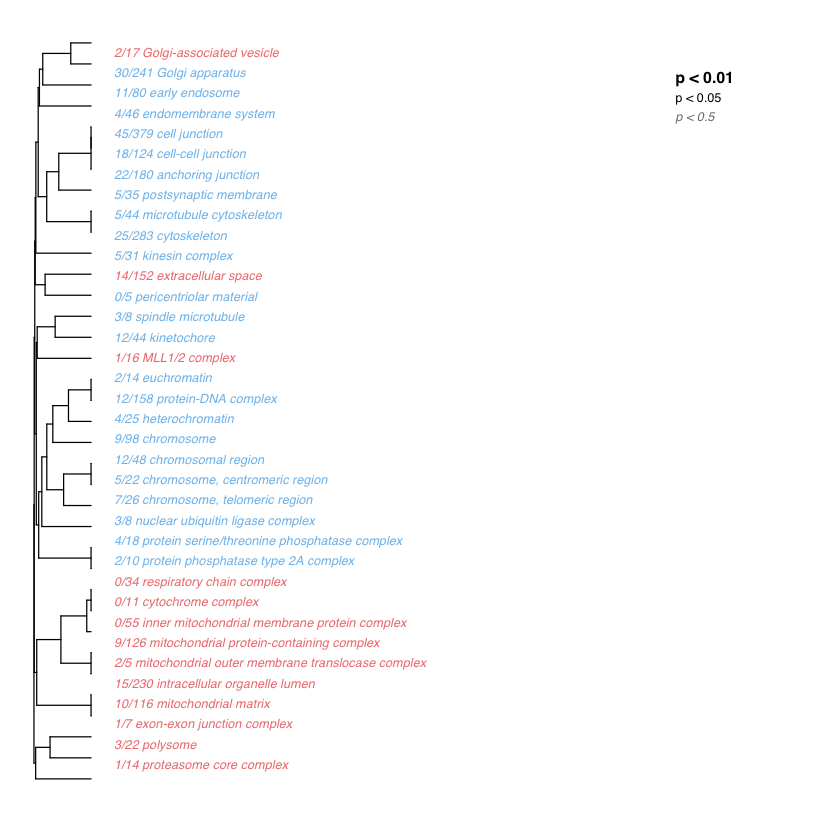

In [32]:
results_RE22vC_CC=gomwuPlot(input_RE22vC,goAnnotations,goDivisionCC,
                            absValue=1,
                            level1=0.5,
                            level2=0.05,
                            level3=0.01,
                            txtsize=1.2,
                            treeHeight=0.5)

In [33]:
results_RE22vC_CC[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
1/14 proteasome core complex,0.28203676,1,lightcoral
3/22 polysome,0.28203676,1,lightcoral
1/7 exon-exon junction complex,0.30809626,1,lightcoral
10/116 mitochondrial matrix,0.28203676,1,lightcoral
15/230 intracellular organelle lumen,0.41448475,1,lightcoral
2/5 mitochondrial outer membrane translocase complex,0.09851915,1,lightcoral
9/126 mitochondrial protein-containing complex,0.16075928,1,lightcoral
0/55 inner mitochondrial membrane protein complex,0.28203676,1,lightcoral
0/11 cytochrome complex,0.47188694,1,lightcoral


*Probiotic vs Control*

Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 7

"Good genes" accounted for:  75 out of 431 ( 17% )



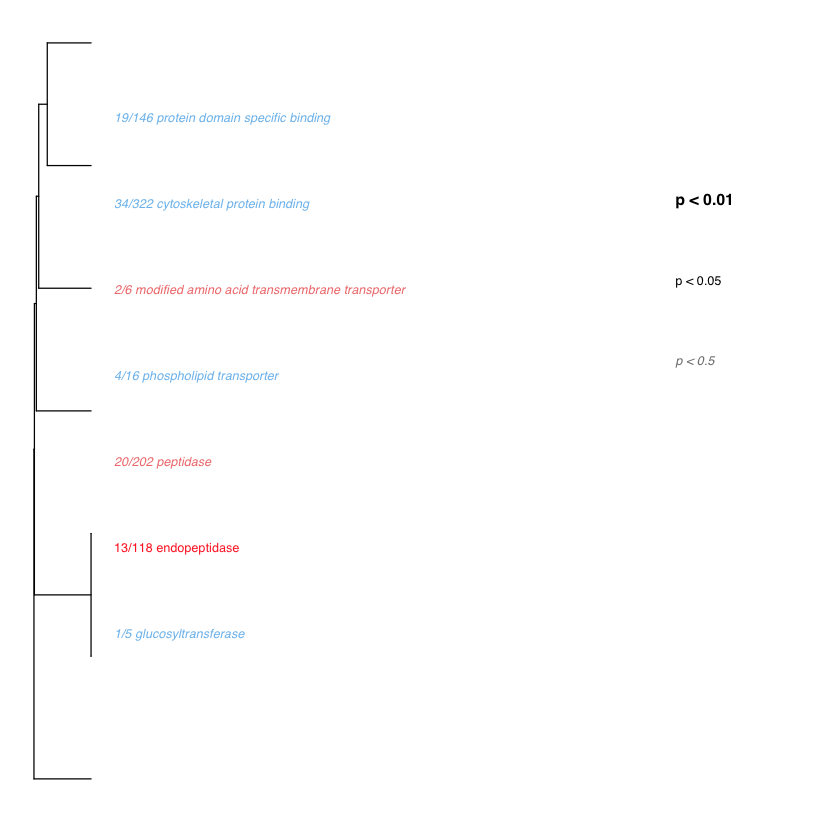

In [34]:
results_S4vC_MF=gomwuPlot(input_S4vC,goAnnotations,goDivisionMF,
                          absValue=1,
                          level1=0.5,
                          level2=0.05,
                          level3=0.01,
                          txtsize=1.2,
                          treeHeight=0.5)

In [35]:
results_S4vC_MF[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
1/5 glucosyltransferase activity,0.47560278,0,skyblue2
13/118 endopeptidase activity,0.01151802,1,firebrick1
20/202 peptidase activity,0.15991506,1,lightcoral
4/16 phospholipid transporter activity,0.19367347,0,skyblue2
2/6 modified amino acid transmembrane transporter activity,0.15991506,1,lightcoral
34/322 cytoskeletal protein binding,0.45478386,0,skyblue2
19/146 protein domain specific binding,0.19367347,0,skyblue2


Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 6

"Good genes" accounted for:  71 out of 476 ( 15% )



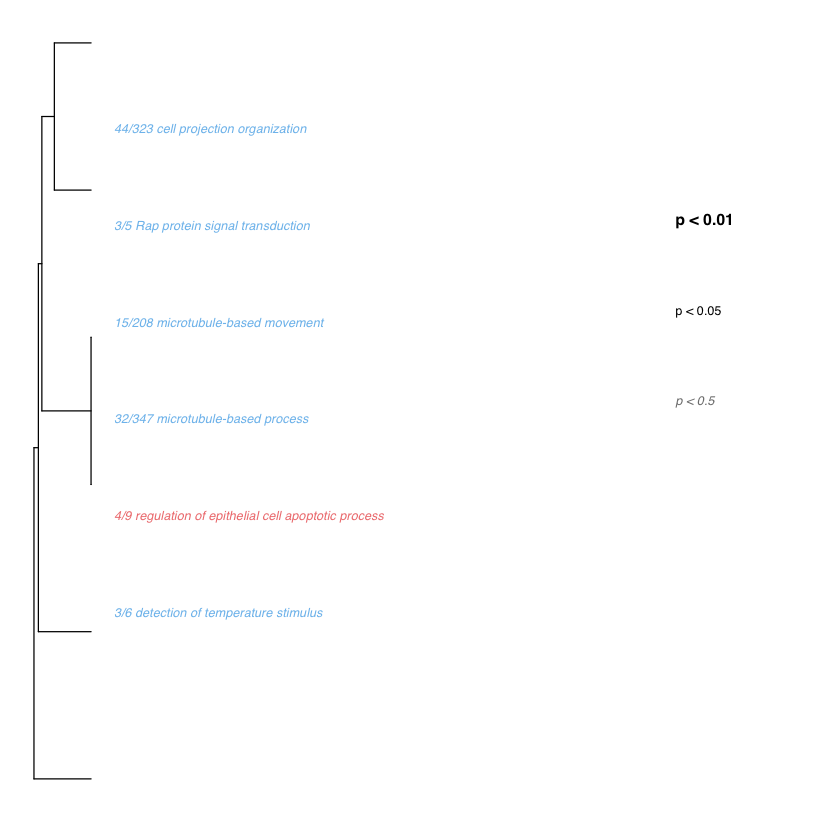

In [36]:
results_S4vC_BP=gomwuPlot(input_S4vC,goAnnotations,goDivisionBP,
                          absValue=1,
                          level1=0.5,
                          level2=0.05,
                          level3=0.01,
                          txtsize=1.2,
                          treeHeight=0.5,)

In [37]:
results_S4vC_BP[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
3/6 detection of temperature stimulus,0.458055,0,skyblue2
4/9 regulation of epithelial cell apoptotic process,0.458055,1,lightcoral
32/347 microtubule-based process,0.458055,0,skyblue2
15/208 microtubule-based movement,0.458055,0,skyblue2
3/5 Rap protein signal transduction,0.458055,0,skyblue2
44/323 cell projection organization,0.458055,0,skyblue2


Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 7

"Good genes" accounted for:  60 out of 422 ( 14% )



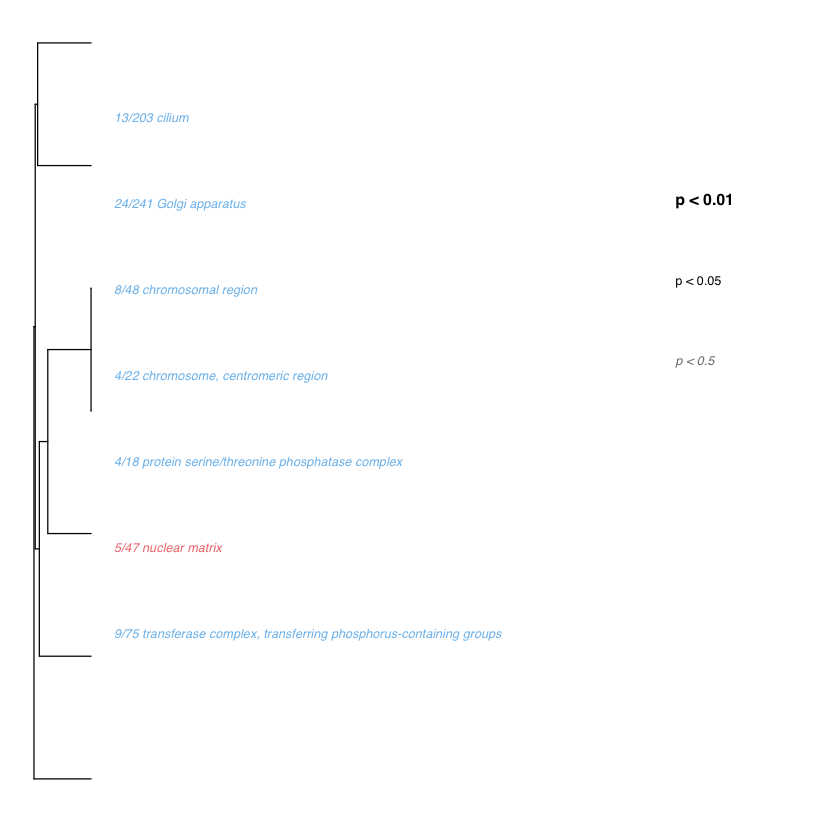

In [38]:
results_S4vC_CC=gomwuPlot(input_S4vC,goAnnotations,goDivisionCC,
                          absValue=1,
                          level1=0.5,
                          level2=0.05,
                          level3=0.01,
                          txtsize=1.2,
                          treeHeight=0.5)

In [39]:
results_S4vC_CC[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
"9/75 transferase complex, transferring phosphorus-containing groups",0.3487008,0,skyblue2
5/47 nuclear matrix,0.4660290,1,lightcoral
4/18 protein serine/threonine phosphatase complex,0.3487008,0,skyblue2
"4/22 chromosome, centromeric region",0.3487008,0,skyblue2
8/48 chromosomal region,0.4384659,0,skyblue2
24/241 Golgi apparatus,0.3162926,0,skyblue2
13/203 cilium,0.4384659,0,skyblue2


*Probiotic vs Pathogen*

Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 26

"Good genes" accounted for:  297 out of 1071 ( 28% )



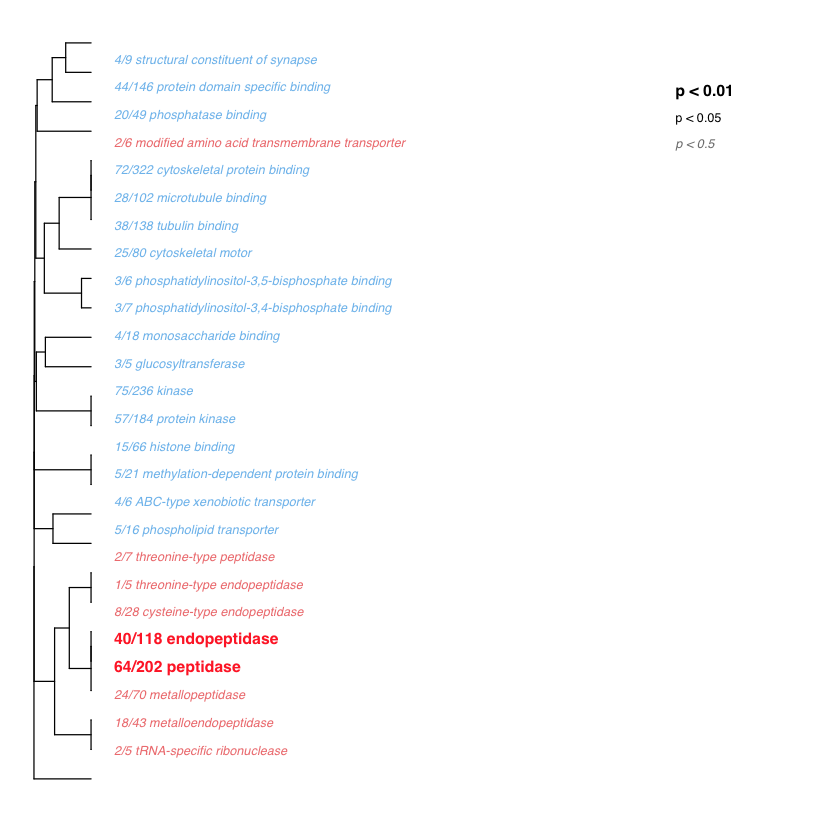

In [40]:
results_RE22vS4_MF=gomwuPlot(input_RE22vS4,goAnnotations,goDivisionMF,
                             absValue=1,
                             level1=0.5,
                             level2=0.05,
                             level3=0.01,
                             txtsize=1.2,
                             treeHeight=0.5)

In [41]:
results_RE22vS4_MF[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
2/5 tRNA-specific ribonuclease activity,0.3290277303,1,lightcoral
18/43 metalloendopeptidase activity,0.1259562084,1,lightcoral
24/70 metallopeptidase activity,0.1030545584,1,lightcoral
64/202 peptidase activity,0.0034531397,1,firebrick1
40/118 endopeptidase activity,0.0001676935,1,firebrick1
8/28 cysteine-type endopeptidase activity,0.3290277303,1,lightcoral
1/5 threonine-type endopeptidase activity,0.3290277303,1,lightcoral
2/7 threonine-type peptidase activity,0.2396168586,1,lightcoral
5/16 phospholipid transporter activity,0.3290277303,0,skyblue2


Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 44

"Good genes" accounted for:  392 out of 1192 ( 33% )



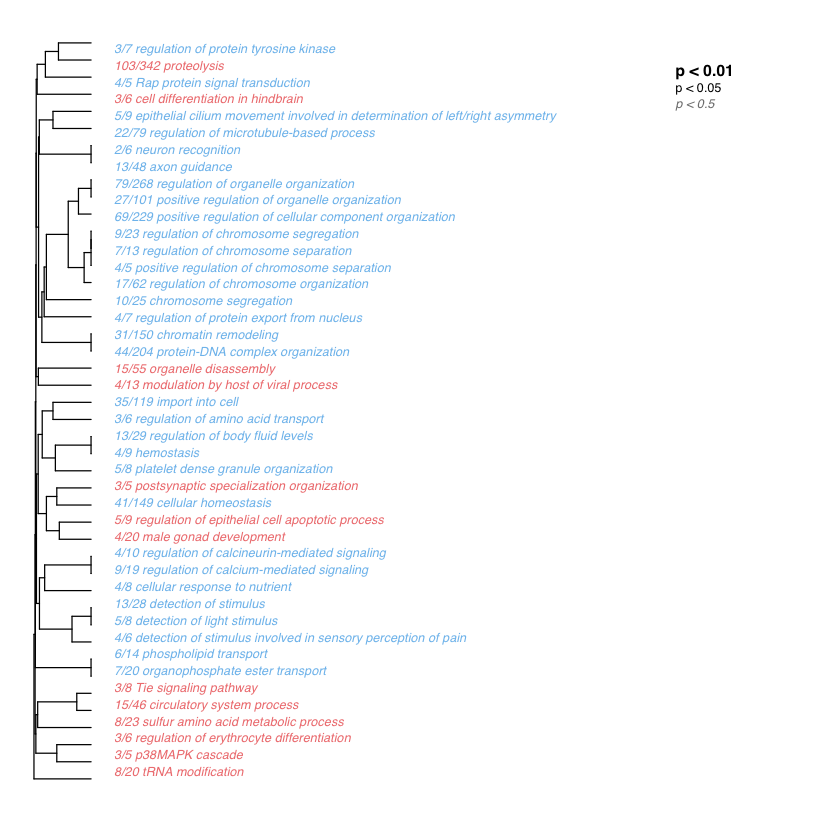

In [42]:
results_RE22vS4_BP=gomwuPlot(input_RE22vS4,goAnnotations,goDivisionBP,
                             absValue=1,
                             level1=0.5,
                             level2=0.05,
                             level3=0.01,
                             txtsize=1.2,
                             treeHeight=0.5)

In [43]:
results_RE22vS4_BP[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
8/20 tRNA modification,0.4899353,1,lightcoral
3/5 p38MAPK cascade,0.4899353,1,lightcoral
3/6 regulation of erythrocyte differentiation,0.4899353,1,lightcoral
8/23 sulfur amino acid metabolic process,0.4899353,1,lightcoral
15/46 circulatory system process,0.4899353,1,lightcoral
3/8 Tie signaling pathway,0.4899353,1,lightcoral
7/20 organophosphate ester transport,0.4899353,0,skyblue2
6/14 phospholipid transport,0.4899353,0,skyblue2
4/6 detection of stimulus involved in sensory perception of pain,0.4899353,0,skyblue2


Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
Warning message in plot.formula(c(1:top) ~ c(1:top), type = "n", axes = F, xlab = "", :
“the formula 'c(1:top) ~ c(1:top)' is treated as 'c(1:top) ~ 1'”
GO terms dispayed: 22

"Good genes" accounted for:  413 out of 1063 ( 39% )



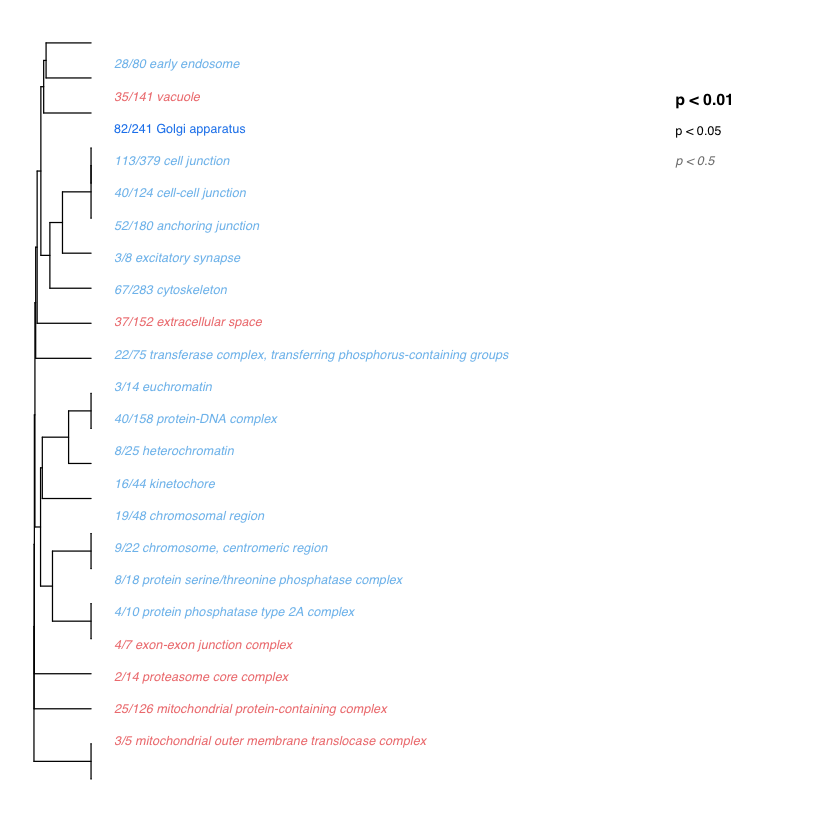

In [44]:
results_RE22vS4_CC=gomwuPlot(input_RE22vS4,goAnnotations,goDivisionCC,
                             absValue=1,
                             level1=0.5,
                             level2=0.05,
                             level3=0.01,
                             txtsize=1.2,
                             treeHeight=0.5)

In [45]:
results_RE22vS4_CC[[1]]

,pval,direction,color
,<dbl>,<dbl>,<chr>
3/5 mitochondrial outer membrane translocase complex,0.23153412,1,lightcoral
25/126 mitochondrial protein-containing complex,0.23630626,1,lightcoral
2/14 proteasome core complex,0.36869067,1,lightcoral
4/7 exon-exon junction complex,0.49879469,1,lightcoral
4/10 protein phosphatase type 2A complex,0.30871621,0,skyblue2
8/18 protein serine/threonine phosphatase complex,0.08474504,0,skyblue2
"9/22 chromosome, centromeric region",0.17529977,0,skyblue2
19/48 chromosomal region,0.08474504,0,skyblue2
16/44 kinetochore,0.38332700,0,skyblue2


<a id=5></a>
## 5. Extracting representative GOs

In this section, we will select GO terms that best represent independent groups of significant GO terms by cutting the results tree at certain thresholds and replotting with the cut level. 

First, we set the adjusted p-value cutoff for representative GOs (`pcut`) and the cut height for the GO terms to get individual groups (`hcut`).

In [46]:
pcut=5e-2
hcut=0.1

Next we plot each results tree with the designated cut level. Here, I chose to focus on only the molecular function results because those were the results with the most significant GO terms.

*Pathogen vs Control*

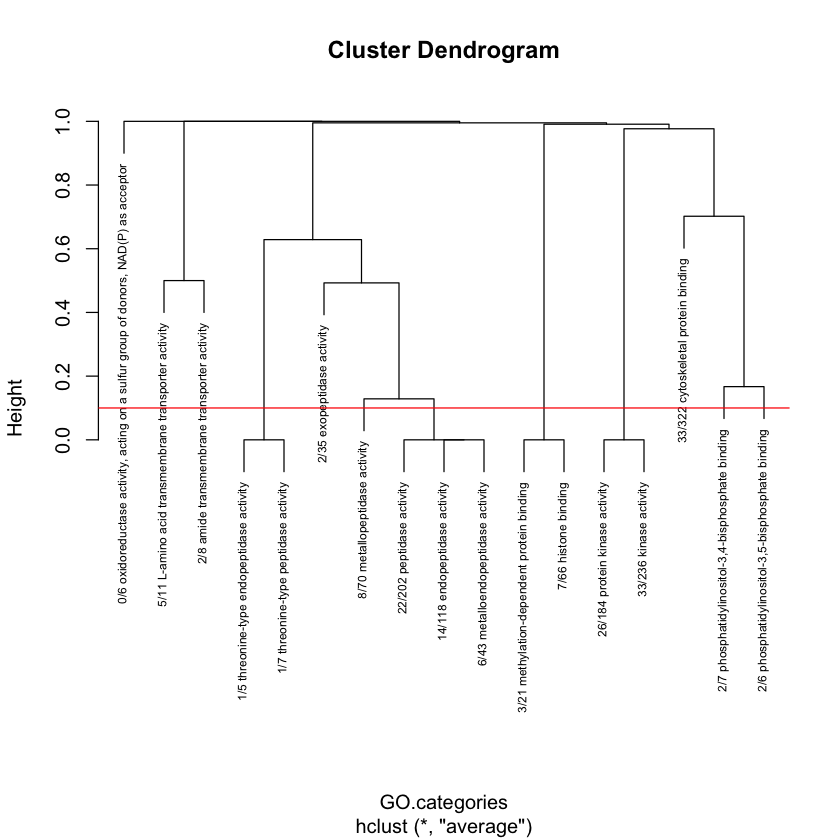

In [47]:
plot(results_RE22vC_MF[[2]],cex=0.6)
abline(h=hcut,col="red")

*Probiotic vs Control*

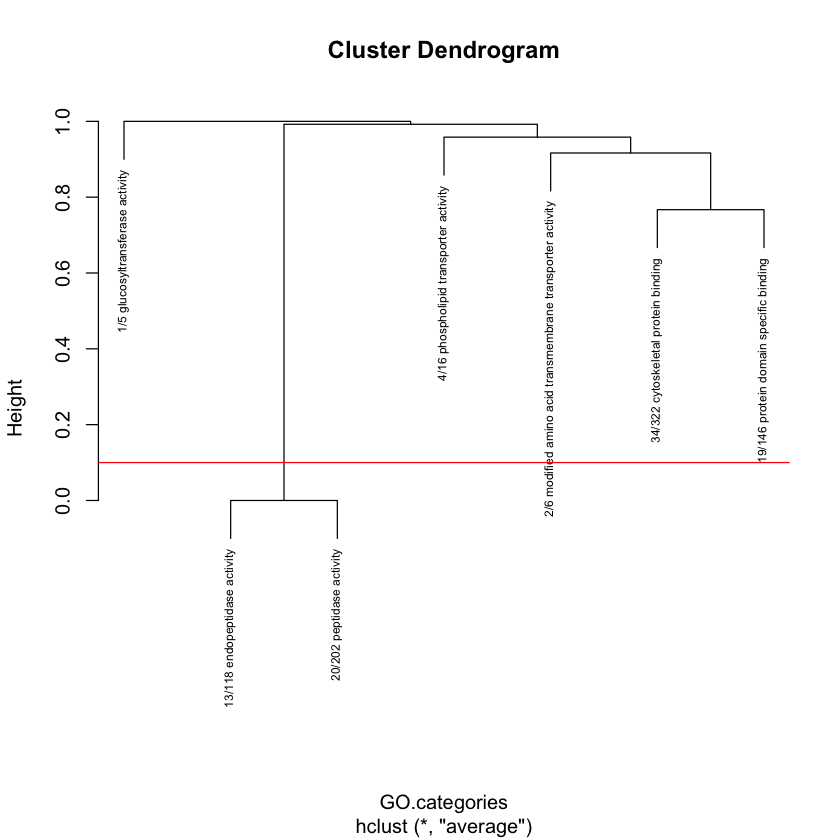

In [48]:
plot(results_S4vC_MF[[2]],cex=0.6)
abline(h=hcut,col="red")

*Probiotic vs Pathogen*

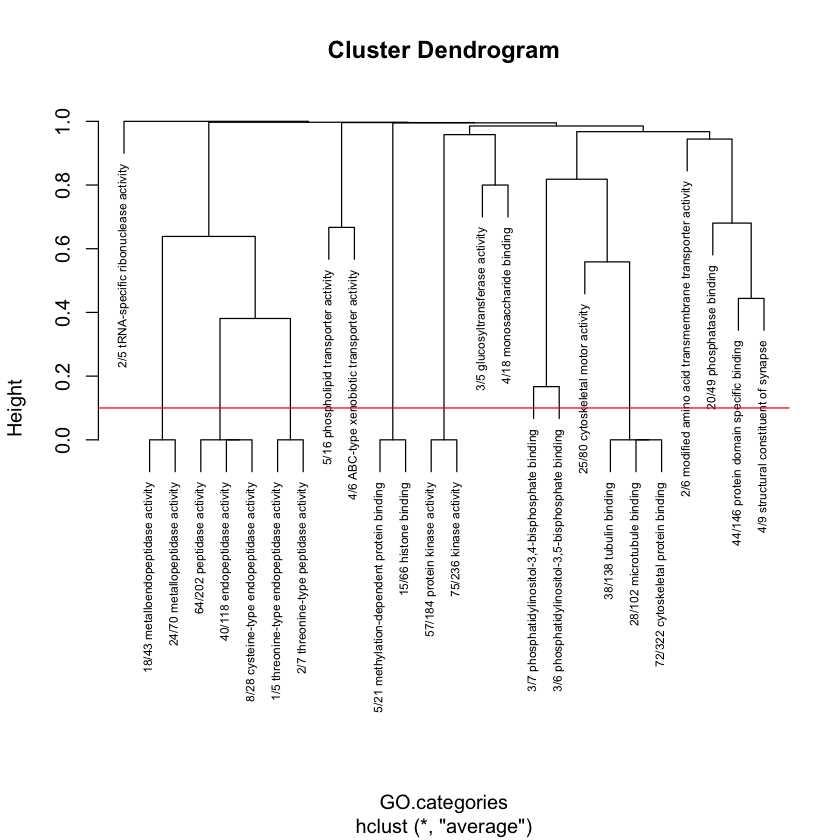

In [49]:
plot(results_RE22vS4_MF[[2]],cex=0.6)
abline(h=hcut,col="red")

After plotting we cut the results, import the new results output, and identify the representative GOs (i.e. best GOs) for  using the following code.

*Pathogen vs Control*

In [50]:
ct=cutree(results_RE22vC_MF[[2]],h=hcut)
annots=c();ci=1
for (ci in unique(ct)) {
  message(ci)
	rn=names(ct)[ct==ci]
	obs=grep("obsolete",rn)
	if(length(obs)>0) { rn=rn[-obs] }
	if (length(rn)==0) {next}
	rr=results_RE22vC_MF[[1]][rn,]
	bestrr=rr[which(rr$pval==min(rr$pval)),]
	best=1
	if(nrow(bestrr)>1) {
		nns=sub(" .+","",row.names(bestrr))
		fr=c()
		for (i in 1:length(nns)) { fr=c(fr,eval(parse(text=nns[i]))) }
		best=which(fr==max(fr))
	}
	if (bestrr$pval[best]<=pcut) { annots=c(annots,sub("\\d+\\/\\d+ ","",row.names(bestrr)[best]))}
}

1

2

3

4

5

6

7

8

9

10

11

12



In [51]:
RE22vControl_mwus <- read.table(paste("MWU",goDivisionMF,input_RE22vC,sep="_"),header=T)

In [52]:
RE22vC_bestGOs=RE22vControl_mwus[RE22vControl_mwus$name %in% annots,]
RE22vC_bestGOs

,delta.rank,pval,level,nseqs,term,name,p.adj
,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
75,511,6.083622e-07,4,118,GO:0004175,endopeptidase activity,0.0003832682
214,567,1.781678e-05,4,70,GO:0008237,metallopeptidase activity,0.0037415245


*Probiotic vs Control*

In [53]:
ct=cutree(results_S4vC_MF[[2]],h=hcut)
annots=c();ci=1
for (ci in unique(ct)) {
  message(ci)
	rn=names(ct)[ct==ci]
	obs=grep("obsolete",rn)
	if(length(obs)>0) { rn=rn[-obs] }
	if (length(rn)==0) {next}
	rr=results_S4vC_MF[[1]][rn,]
	bestrr=rr[which(rr$pval==min(rr$pval)),]
	best=1
	if(nrow(bestrr)>1) {
		nns=sub(" .+","",row.names(bestrr))
		fr=c()
		for (i in 1:length(nns)) { fr=c(fr,eval(parse(text=nns[i]))) }
		best=which(fr==max(fr))
	}
	if (bestrr$pval[best]<=pcut) { annots=c(annots,sub("\\d+\\/\\d+ ","",row.names(bestrr)[best]))}
}

1

2

3

4

5

6



In [54]:
S4vControl_mwus <- read.table(paste("MWU",goDivisionMF,input_S4vC,sep="_"),header=T)

In [55]:
S4vC_bestGOs=S4vControl_mwus[S4vControl_mwus$name %in% annots,]
S4vC_bestGOs

,delta.rank,pval,level,nseqs,term,name,p.adj
,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
75,439,1.828257e-05,2,118,GO:0004175,endopeptidase activity,0.01151802


*Probiotic vs Pathogen*

In [56]:
ct=cutree(results_RE22vS4_MF[[2]],h=hcut)
annots=c();ci=1
for (ci in unique(ct)) {
  message(ci)
	rn=names(ct)[ct==ci]
	obs=grep("obsolete",rn)
	if(length(obs)>0) { rn=rn[-obs] }
	if (length(rn)==0) {next}
	rr=results_RE22vS4_MF[[1]][rn,]
	bestrr=rr[which(rr$pval==min(rr$pval)),]
	best=1
	if(nrow(bestrr)>1) {
		nns=sub(" .+","",row.names(bestrr))
		fr=c()
		for (i in 1:length(nns)) { fr=c(fr,eval(parse(text=nns[i]))) }
		best=which(fr==max(fr))
	}
	if (bestrr$pval[best]<=pcut) { annots=c(annots,sub("\\d+\\/\\d+ ","",row.names(bestrr)[best]))}
}

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18



In [57]:
RE22vS4_mwus <- read.table(paste("MWU",goDivisionMF,input_RE22vS4,sep="_"),header=T)

In [58]:
RE22vS4_bestGOs=RE22vS4_mwus[RE22vS4_mwus$name %in% annots,]
RE22vS4_bestGOs

,delta.rank,pval,level,nseqs,term,name,p.adj
,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>
75,528,2.661801e-07,3,118,GO:0004175,endopeptidase activity,0.0001676935


<a id=6></a>
## 6. Plotting enrichment results
Next we will plot the GO enrichment results for all MF terms with p-adjusted values of < 0.1. We start by importing the data for each comparison as a new dataframe in R.

In [59]:
RE22vControl <- read.table("MWU_MF_DEseq_RE22vControl_LFC.csv", sep = " ", header = TRUE)
RE22vS4 <- read.table("MWU_MF_DEseq_RE22vS4_LFC.csv", sep = " ", header = TRUE)
S4vControl <- read.table("MWU_MF_DEseq_S4vControl_LFC.csv", sep = " ", header = TRUE)

Now we add a column to each dataframe indicating the comparison for that dataframe. We do this so we can combine them into a single dataframe (second code block) and make a single plot faceted by comparison.

In [60]:
RE22vControl$comparison <- "Pathogen vs Control"
RE22vS4$comparison <- "Probiotic vs Pathogen"
S4vControl$comparison <- "Probiotic vs Control"

In [61]:
merged_data <- rbind(RE22vControl, RE22vS4, S4vControl)

Next, we filter the merged dataframe to only the significant terms. This filtering allows us to only plot the GO terms of interest to us rather than the full list of terms. The first code block isolates the significant data. The second block of code reorders the comparisons to the order we want them plotted in.

In [62]:
sig_data <- subset(merged_data, p.adj < 0.1)

In [63]:
sig_data$comparison <- factor(sig_data$comparison, levels = c("Pathogen vs Control","Probiotic vs Pathogen","Probiotic vs Control"))

Here we add a column to indicate significance level. We will use this to assign fill color during plotting.

In [64]:
sig_data <- sig_data %>% mutate(sig = case_when(p.adj > 0.1 ~ "not sig",
                                                          p.adj > 0.05 ~ "sig",
                                                          p.adj < 0.05 ~ "very sig"
                                                          ))
head(sig_data)

,delta.rank,pval,level,nseqs,term,name,p.adj,comparison,sig
,<int>,<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<fct>,<chr>
75,511,6.083622e-07,4,118,GO:0004175,endopeptidase activity,0.0003832682,Pathogen vs Control,very sig
82,601,3.543026e-04,2,43,GO:0004222,metalloendopeptidase activity,0.0558026543,Pathogen vs Control,sig
210,365,4.157936e-06,2,202,GO:0008233,peptidase activity,0.0013097498,Pathogen vs Control,very sig
214,567,1.781678e-05,4,70,GO:0008237,metallopeptidase activity,0.0037415245,Pathogen vs Control,very sig
705,528,2.661801e-07,3,118,GO:0004175,endopeptidase activity,0.0001676935,Probiotic vs Pathogen,very sig
818,-225,4.296243e-04,2,322,GO:0008092,cytoskeletal protein binding,0.0902210996,Probiotic vs Pathogen,sig


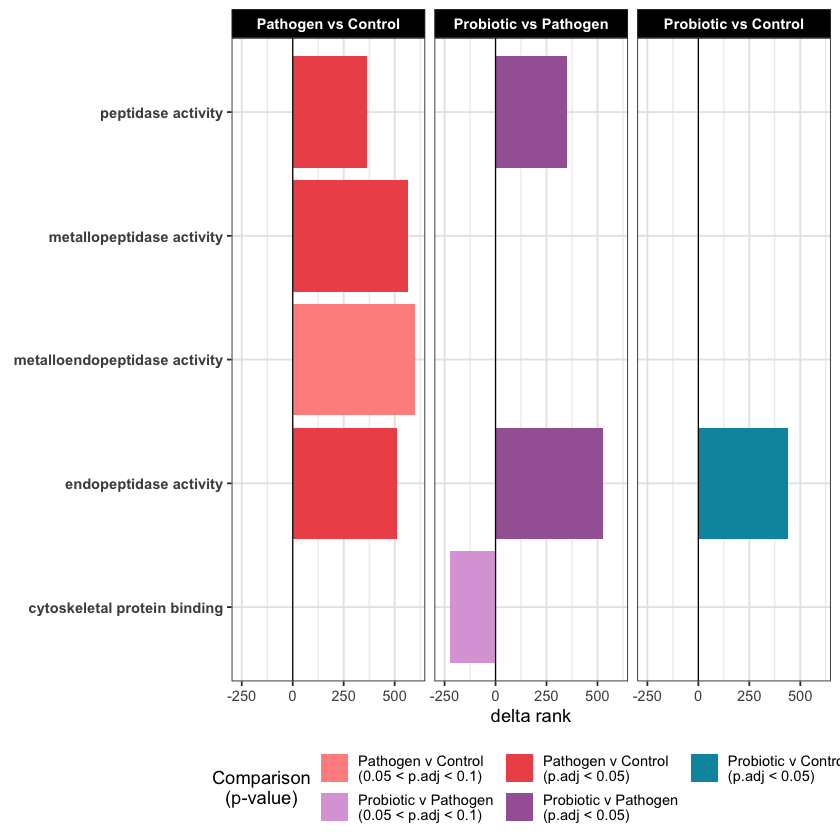

In [65]:
plot <- ggplot(sig_data, aes(delta.rank, name, fill = interaction(comparison, sig))) + 
        geom_bar(stat = "identity", position = position_dodge2(width = 1, preserve = "single")) +
        theme_bw() + theme(panel.grid = element_line(color = "grey90")) + theme(axis.title.y = element_blank()) + 
        scale_x_continuous(expand = c(0,0), limits = c(-300,650)) + 
        scale_fill_manual(values = c('Probiotic vs Control.very sig' = "#0096ad",
                                     'Probiotic vs Control.sig' = "#7bcedc",
                                     'Pathogen vs Control.very sig' = "#ee5559",
                                     'Pathogen vs Control.sig' = "#ff9290",
                                     'Probiotic vs Pathogen.very sig' = "#a566a4",
                                     'Probiotic vs Pathogen.sig' = "#dca6da"), 
                          labels = c('Probiotic vs Control.very sig' = "Probiotic v Control\n(p.adj < 0.05)",
                                     'Probiotic vs Control.sig' = "Probiotic v Control\n(0.05 < p.adj < 0.1)",
                                     'Pathogen vs Control.very sig' = "Pathogen v Control\n(p.adj < 0.05)",
                                     'Pathogen vs Control.sig' = "Pathogen v Control\n(0.05 < p.adj < 0.1)",
                                     'Probiotic vs Pathogen.very sig' = "Probiotic v Pathogen\n(p.adj < 0.05)",
                                     'Probiotic vs Pathogen.sig' = "Probiotic v Pathogen\n(0.05 < p.adj < 0.1)")) +
  xlab("delta rank") + theme(legend.position = "bottom") + theme(axis.text.y = element_text(face = "bold")) + guides(fill = guide_legend(title = "Comparison\n(p-value)", ncol = 3, nrow = 2)) + 
  theme(legend.title = element_text(hjust = 0.5)) + geom_vline(xintercept = 0, lwd = 0.35) + facet_grid(~comparison) + 
  theme(strip.background = element_rect(fill = "black"), strip.text = element_text(face = "bold", color = "white"))
plot

Plot was exported using `ggsave()` and final edits for publication were made using Adobe Illustrator.

In [ ]:
ggsave("~/Desktop/GO_MWU_plot.pdf", plot, height = 5, width = 9)